In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms as T
import ssl

## Load Dataset

In [4]:
# load cifar10 dataset
ssl._create_default_https_context = ssl._create_unverified_context
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=T.ToTensor())
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=T.ToTensor())


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
idx_to_class = {v: k for k, v in trainset.class_to_idx.items()}
idx_to_class

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [6]:
X_train, y_train = trainset.data, trainset.targets
X_test, y_test = testset.data, testset.targets

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', len(y_train))
print('y_test shape:', len(y_test))

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: 50000
y_test shape: 10000


In [7]:
print('X_train dtype:', X_train.dtype)
print('X_train min/max:', X_train.min(), X_train.max())

X_train dtype: uint8
X_train min/max: 0 255


## Visualize Original Images

In [8]:
X_sample = X_train[:10]
y_sample = y_train[:10]

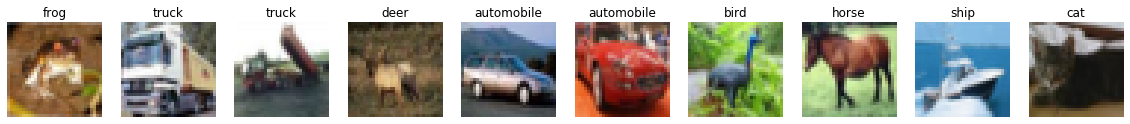

In [9]:
# plot sample images
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(X_sample[i])
    ax[i].set_title(idx_to_class[y_sample[i]])
    ax[i].axis('off')
plt.show()

## 1. Resize and Flip

In [10]:
# size and flip
transform = T.Compose([
    T.ToTensor(),
    T.Resize((28, 28)),
    T.RandomHorizontalFlip(p=1.0),
    T.RandomVerticalFlip(p=1.0)
])

In [11]:
X_sample.shape

(10, 32, 32, 3)

In [12]:
X_transformed_1 = [transform(x) for x in X_sample]

In [13]:
X_transformed_1[0].dtype, X_transformed_1[0].shape, X_transformed_1[0].min(), X_transformed_1[0].max()

(torch.float32, torch.Size([3, 28, 28]), tensor(0.0014), tensor(0.9968))

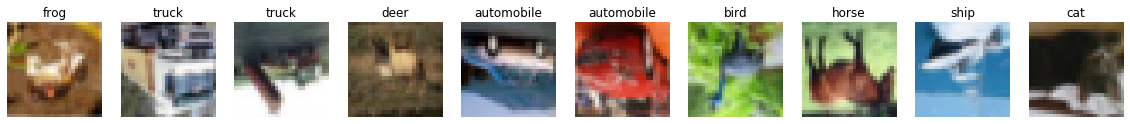

In [14]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(X_transformed_1[i].permute(1, 2, 0))
    ax[i].set_title(idx_to_class[y_sample[i]])
    ax[i].axis('off')
plt.show()

## 2. Geometric Transform

In [15]:
"""
degrees (sequence or number) – Range of degrees to select from. If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees). Set to 0 to deactivate rotations.

translate (tuple, optional) – tuple of maximum absolute fraction for horizontal and vertical translations. For example translate=(a, b), then horizontal shift is randomly sampled in the range -img_width * a < dx < img_width * a and vertical shift is randomly sampled in the range -img_height * b < dy < img_height * b. Will not translate by default.

scale (tuple, optional) – scaling factor interval, e.g (a, b), then scale is randomly sampled from the range a <= scale <= b. Will keep original scale by default.

shear (sequence or number, optional) – Range of degrees to select from. If shear is a number, a shear parallel to the x-axis in the range (-shear, +shear) will be applied. Else if shear is a sequence of 2 values a shear parallel to the x-axis in the range (shear[0], shear[1]) will be applied. Else if shear is a sequence of 4 values, an x-axis shear in (shear[0], shear[1]) and y-axis shear in (shear[2], shear[3]) will be applied. Will not apply shear by default.

interpolation (InterpolationMode) – Desired interpolation enum defined by torchvision.transforms.InterpolationMode. Default is InterpolationMode.NEAREST. If input is Tensor, only InterpolationMode.NEAREST, InterpolationMode.BILINEAR are supported. The corresponding Pillow integer constants, e.g. PIL.Image.BILINEAR are accepted as well.

fill (sequence or number) – Pixel fill value for the area outside the transformed image. Default is 0. If given a number, the value is used for all bands respectively.

center (sequence, optional) – Optional center of rotation, (x, y). Origin is the upper left corner. Default is the center of the image.
"""

'\ndegrees (sequence or number) – Range of degrees to select from. If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees). Set to 0 to deactivate rotations.\n\ntranslate (tuple, optional) – tuple of maximum absolute fraction for horizontal and vertical translations. For example translate=(a, b), then horizontal shift is randomly sampled in the range -img_width * a < dx < img_width * a and vertical shift is randomly sampled in the range -img_height * b < dy < img_height * b. Will not translate by default.\n\nscale (tuple, optional) – scaling factor interval, e.g (a, b), then scale is randomly sampled from the range a <= scale <= b. Will keep original scale by default.\n\nshear (sequence or number, optional) – Range of degrees to select from. If shear is a number, a shear parallel to the x-axis in the range (-shear, +shear) will be applied. Else if shear is a sequence of 2 values a shear parallel to the x-axis in the range (shear[0],

In [16]:
transform_2 = T.Compose([
    T.ToTensor(),
    T.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
])

In [17]:
X_transformed_2 = [transform_2(x) for x in X_sample]

In [18]:
X_transformed_2[0].dtype, X_transformed_2[0].shape, X_transformed_2[0].min(), X_transformed_2[0].max()

(torch.float32, torch.Size([3, 32, 32]), tensor(0.), tensor(1.))

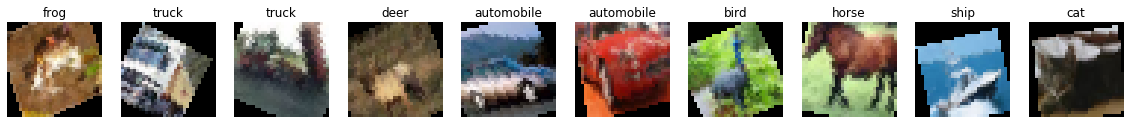

In [19]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(X_transformed_2[i].permute(1, 2, 0))
    ax[i].set_title(idx_to_class[y_sample[i]])
    ax[i].axis('off')
plt.show()

## 3. Color Transform

In [20]:
"""
brightness (float or tuple of python:float (min, max)) – How much to jitter brightness. brightness_factor is chosen uniformly from [max(0, 1 - brightness), 1 + brightness] or the given [min, max]. Should be non negative numbers.

contrast (float or tuple of python:float (min, max)) – How much to jitter contrast. contrast_factor is chosen uniformly from [max(0, 1 - contrast), 1 + contrast] or the given [min, max]. Should be non-negative numbers.

saturation (float or tuple of python:float (min, max)) – How much to jitter saturation. saturation_factor is chosen uniformly from [max(0, 1 - saturation), 1 + saturation] or the given [min, max]. Should be non negative numbers.

hue (float or tuple of python:float (min, max)) – How much to jitter hue. hue_factor is chosen uniformly from [-hue, hue] or the given [min, max]. Should have 0<= hue <= 0.5 or -0.5 <= min <= max <= 0.5. To jitter hue, the pixel values of the input image has to be non-negative for conversion to HSV space; thus it does not work if you normalize your image to an interval with negative values, or use an interpolation that generates negative values before using this function.

"""

'\nbrightness (float or tuple of python:float (min, max)) – How much to jitter brightness. brightness_factor is chosen uniformly from [max(0, 1 - brightness), 1 + brightness] or the given [min, max]. Should be non negative numbers.\n\ncontrast (float or tuple of python:float (min, max)) – How much to jitter contrast. contrast_factor is chosen uniformly from [max(0, 1 - contrast), 1 + contrast] or the given [min, max]. Should be non-negative numbers.\n\nsaturation (float or tuple of python:float (min, max)) – How much to jitter saturation. saturation_factor is chosen uniformly from [max(0, 1 - saturation), 1 + saturation] or the given [min, max]. Should be non negative numbers.\n\nhue (float or tuple of python:float (min, max)) – How much to jitter hue. hue_factor is chosen uniformly from [-hue, hue] or the given [min, max]. Should have 0<= hue <= 0.5 or -0.5 <= min <= max <= 0.5. To jitter hue, the pixel values of the input image has to be non-negative for conversion to HSV space; thus

In [21]:
# color
transform_3 = T.Compose([
    T.ToTensor(),
    T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
])

In [22]:
X_transformed_3 = [transform_3(x) for x in X_sample]

In [23]:
X_transformed_2[0].dtype, X_transformed_2[0].shape, X_transformed_2[0].min(), X_transformed_2[0].max()

(torch.float32, torch.Size([3, 32, 32]), tensor(0.), tensor(1.))

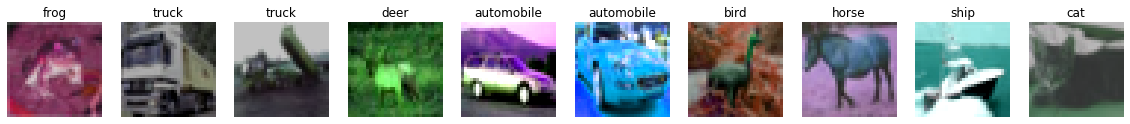

In [24]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(X_transformed_3[i].permute(1, 2, 0))
    ax[i].set_title(idx_to_class[y_sample[i]])
    ax[i].axis('off')
plt.show()

## Applying Augmentation to Training

In [25]:
transform = T.Compose([
    T.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
])

In [26]:
from torch.utils.data import DataLoader

In [31]:
dataloader_train = DataLoader(trainset, batch_size=32, shuffle=False)
dataloader_test = DataLoader(testset, batch_size=32, shuffle=False)

In [32]:
X, y = next(iter(dataloader_train))

In [33]:
## train example with augmentation

for X, y in dataloader_train:
    # apply transformation
    X_augmented = torch.stack([transform(x) for x in X])

    # forward
    # y_hat = model(X_augmented)
    # loss = criterion(y_hat, y)
    break

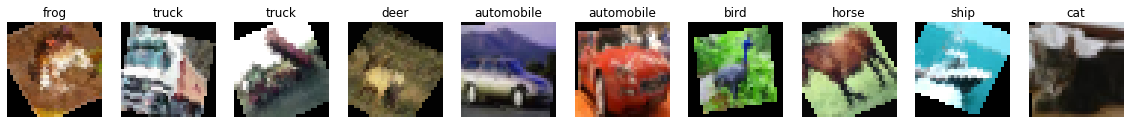

In [34]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(X_augmented[i].permute(1, 2, 0))
    ax[i].set_title(idx_to_class[y_sample[i]])
    ax[i].axis('off')
plt.show()